<a href="https://colab.research.google.com/github/MoutazMohamed0/Data-110/blob/main/MoutazMohamed_week5_data110_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Survived indicates whether the passenger lived through the journey, with 0 representing death and 1 representing survival. PClass denotes the passenger's class aboard the ship, on a scale from 1 to 3. Sex indicates the passenger's gender, whether male or female. Age refers to the passengers age at the time of the voyage. Sibsp shows the number of siblings or spouses the passenger had with them on board. Fare represents the amount the passenger paid for their ticket. Embarked specifies the port where the passenger boarded the ship, represented by the first letter of the ports name (S for Southampton, C for Cherbourg). Class, similar to PClass, reflects the passenger's class but is listed as First, Second, or Third, instead of a numeric scale. Who is a similar category to Sex, identifying whether the passenger was male or female. Adult Male indicates whether the passenger was an adult male (True) or not (False). Deck represents the deck level where the passengers cabin was located. Embarked Town, like Embarked, provides more detailed information about the port where the passenger boarded, using the full name of the location. Alive shows whether the passenger survived the voyage. Alone identifies whether the passenger was traveling alone.

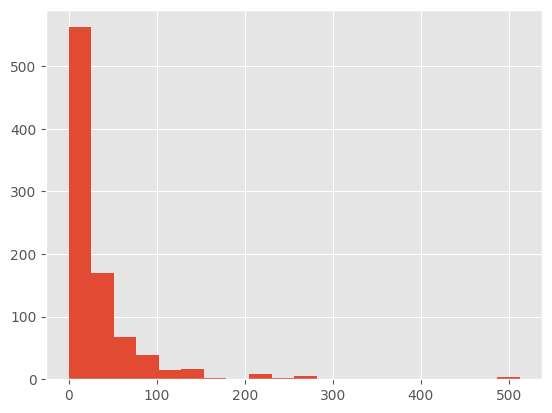

In [4]:
plt.style.use('ggplot')
plt.hist(titanic['fare'],bins=20)
plt.show()

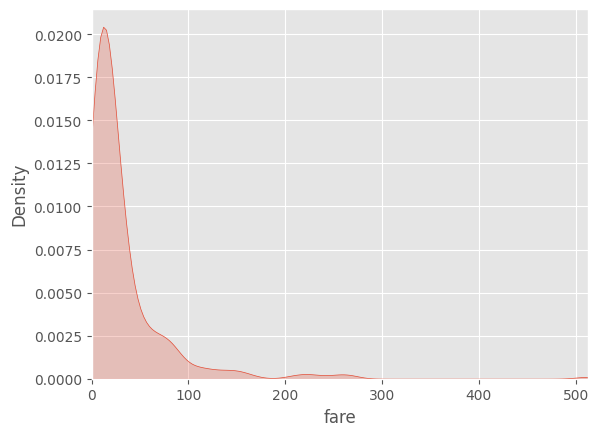

In [5]:
sns.kdeplot(titanic['fare'], fill=True)
max_fare = titanic['fare'].max()
plt.xlim(0, max_fare)
plt.show()

Most passengers spent less than 100 on their tickets, though there were a few exceptions with some passengers paying over 500. Its possible that those who paid higher fares had a better chance of survival due to superior accommodations

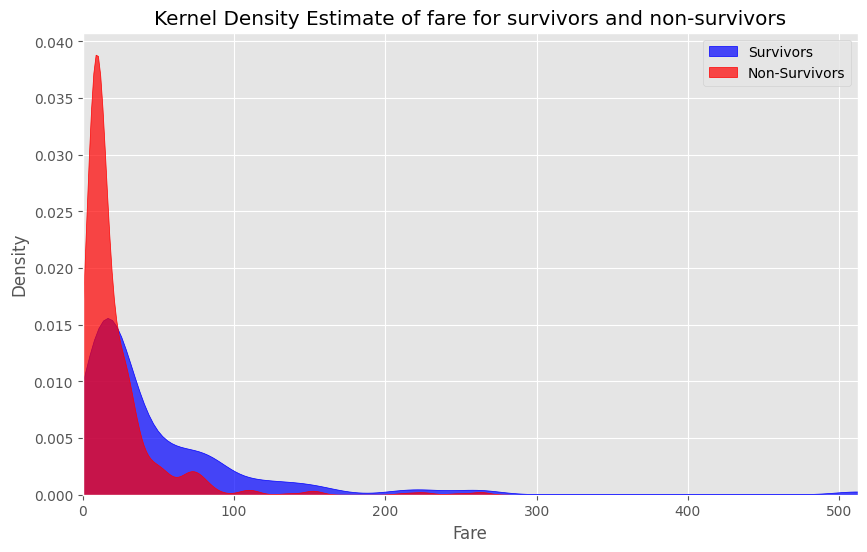

In [6]:
plt.figure(figsize=(10, 6))
sns.kdeplot(titanic[titanic['alive'] == 'yes']['fare'], bw_adjust=0.7, fill=True, color="blue", alpha=0.7, label='Survivors')
sns.kdeplot(titanic[titanic['alive'] == 'no']['fare'], bw_adjust=0.7, fill=True, color="red", alpha=0.7, label='Non-Survivors')
plt.xlim(0, max_fare)
plt.title('Kernel Density Estimate of fare for survivors and non-survivors')
plt.xlabel('Fare')
plt.ylabel('Density')
plt.legend()
plt.show()

The data appears to indicate that passengers who paid lower fares had a reduced chance of survival. This implies a positive correlation between survival rate and socioeconomic status

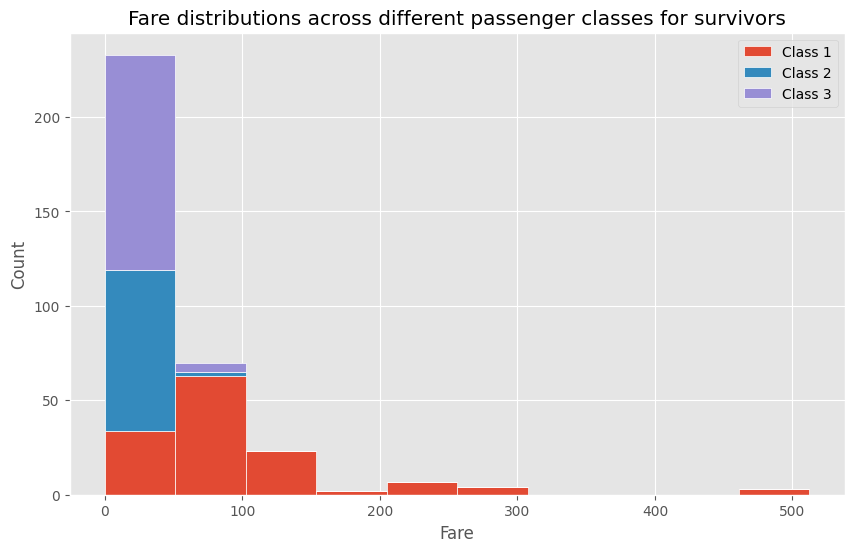

In [11]:

survived_class1 = titanic[(titanic['pclass'] == 1) & (titanic['alive'] == 'yes')]['fare'].dropna()
survived_class2 = titanic[(titanic['pclass'] == 2) & (titanic['alive'] == 'yes')]['fare'].dropna()
survived_class3 = titanic[(titanic['pclass'] == 3) & (titanic['alive'] == 'yes')]['fare'].dropna()
plt.figure(figsize=(10, 6))
plt.hist([survived_class1, survived_class2, survived_class3], stacked=True, edgecolor='white', label=['Class 1', 'Class 2', 'Class 3'])
plt.title('Fare distributions across different passenger classes for survivors')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.legend()
plt.show()

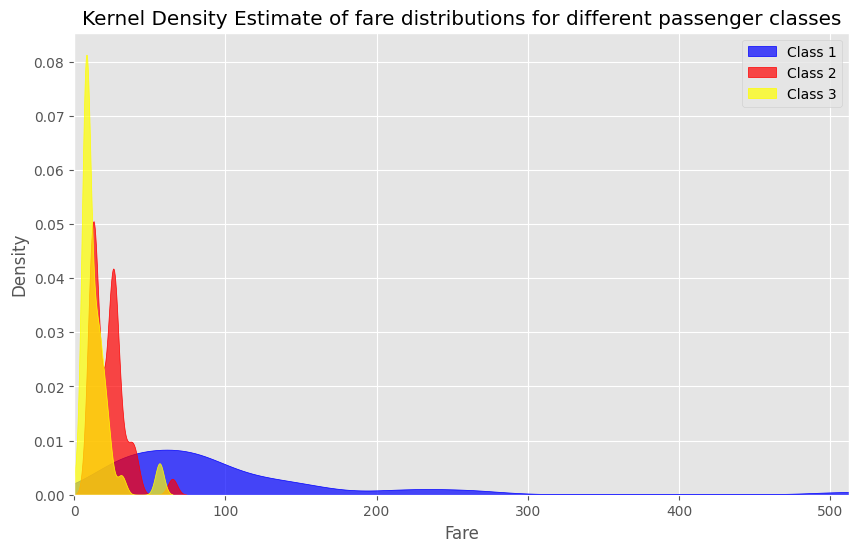

In [8]:
survived_class1 = titanic[(titanic['pclass'] == 1) & (titanic['alive'] == 'yes')]['fare'].dropna()
survived_class2 = titanic[(titanic['pclass'] == 2) & (titanic['alive'] == 'yes')]['fare'].dropna()
survived_class3 = titanic[(titanic['pclass'] == 3) & (titanic['alive'] == 'yes')]['fare'].dropna()
plt.figure(figsize=(10, 6))
plt.xlim(0, max_fare)
sns.kdeplot(survived_class1, bw_adjust=0.7, fill=True, color="blue", alpha=0.7, label='Class 1')
sns.kdeplot(survived_class2, bw_adjust=0.7, fill=True, color="red", alpha=0.7, label='Class 2')
sns.kdeplot(survived_class3, bw_adjust=0.7, fill=True, color="yellow", alpha=0.7, label='Class 3')
plt.title('Kernel Density Estimate of fare distributions for different passenger classes')
plt.xlabel('Fare')
plt.ylabel('Density')
plt.legend()
plt.show()

The data reveals that survivors in class 1 generally paid higher fares compared to those in other classes, while survivors in class 2 paid more than those in class 3. The distribution of fares reflects the link between socioeconomic status (which we have established is positively correlated with survival rate) and fare, leading us to infer a positive correlation between fare and survival rate

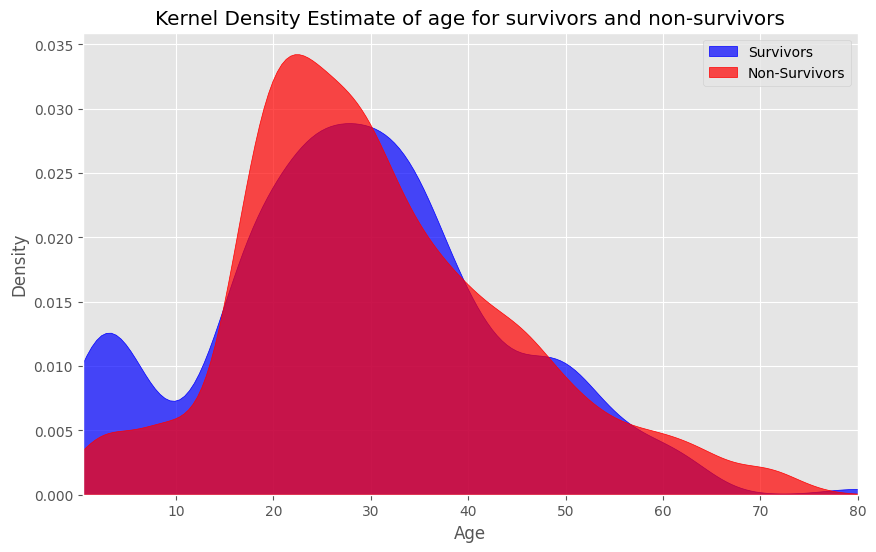

In [10]:
plt.figure(figsize=(10, 6))
sns.kdeplot(titanic[titanic['alive'] == 'yes']['age'], bw_adjust=0.7, fill=True, color="blue", alpha=0.7, label='Survivors')
sns.kdeplot(titanic[titanic['alive'] == 'no']['age'], bw_adjust=0.7, fill=True, color="red", alpha=0.7, label='Non-Survivors')
max_age = titanic['age'].max()
min_age = titanic['age'].min()
plt.xlim(min_age, max_age)
plt.title('Kernel Density Estimate of age for survivors and non-survivors')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()

The data indicates that younger and older passengers had a higher survival rate compared to middle aged passengers. Age might have influenced survival rates, as infants and elderly passengers may have taken prioity during the evacuation process

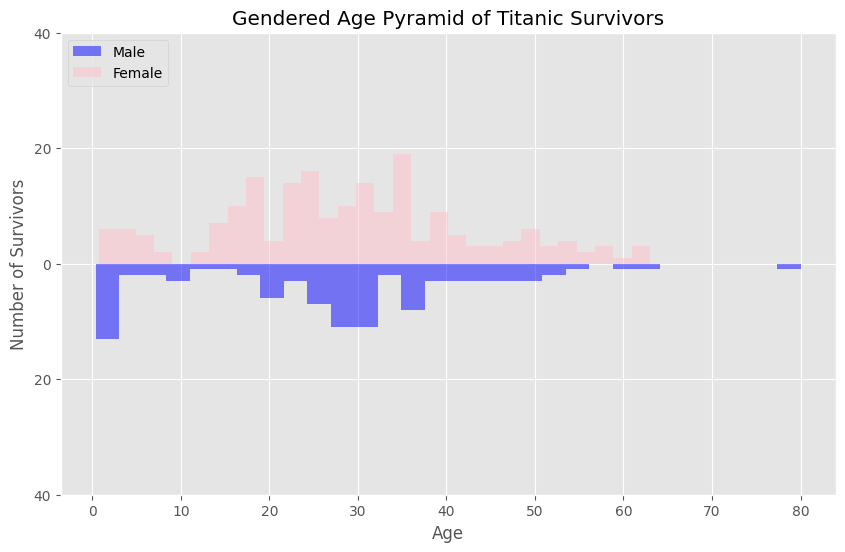

In [12]:
survived_male = titanic[(titanic['sex'] == 'male') & (titanic['alive'] == 'yes')]['age'].dropna()
survived_female = titanic[(titanic['sex'] == 'female') & (titanic['alive'] == 'yes')]['age'].dropna()
plt.figure(figsize=(10, 6))
plt.hist(survived_male , bins=30, label='Male', alpha=0.5, color='blue', orientation='vertical', weights=[-1] * len(survived_male))
plt.hist(survived_female, bins=30, label='Female', alpha=0.5, color='pink', orientation='vertical', weights=[1] * len(survived_female))
plt.xlabel('Age')
plt.ylabel('Number of Survivors')
plt.title('Gendered Age Pyramid of Titanic Survivors')
plt.yticks([-40, -20, 0, 20, 40], [40, 20, 0, 20, 40])
plt.legend(loc='upper left')
plt.show()

The data appears to show that, overall, more females survived than males. We can infer that females had a higher survival rate across most age groups, and that survival rate is positively associated with being female.